<a href="https://colab.research.google.com/github/darialrsm/KSVD/blob/main/%D0%A5%D0%B0%D1%85%D0%BB%D1%94%D0%B2%D0%B0_%D0%9B%D0%A0_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 9. PySpark

In [1]:
!pip install pyspark==3.5.1

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .master('local[*]')\
    .appName('Colab_PySpark')\
    .getOrCreate()

1) Завантжатити датасет https://www.kaggle.com/datasets/soheiltehranipour/cruise-used-for-pyspark

2) Виконати основні функції для спарк і побудувати 3 графіки

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cruise_dataset.csv to cruise_dataset.csv


In [4]:
data = spark.read.csv(
    'cruise_dataset.csv',
    sep=',',
    header=True,
    inferSchema=True
)

data.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [5]:
data.schema

StructType([StructField('Ship_name', StringType(), True), StructField('Cruise_line', StringType(), True), StructField('Age', IntegerType(), True), StructField('Tonnage', DoubleType(), True), StructField('passengers', DoubleType(), True), StructField('length', DoubleType(), True), StructField('cabins', DoubleType(), True), StructField('passenger_density', DoubleType(), True), StructField('crew', DoubleType(), True)])

In [6]:
data.dtypes

[('Ship_name', 'string'),
 ('Cruise_line', 'string'),
 ('Age', 'int'),
 ('Tonnage', 'double'),
 ('passengers', 'double'),
 ('length', 'double'),
 ('cabins', 'double'),
 ('passenger_density', 'double'),
 ('crew', 'double')]

In [7]:
data.head(3)

[Row(Ship_name='Journey', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55),
 Row(Ship_name='Quest', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55),
 Row(Ship_name='Celebration', Cruise_line='Carnival', Age=26, Tonnage=47.262, passengers=14.86, length=7.22, cabins=7.43, passenger_density=31.8, crew=6.7)]

In [8]:
data.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [9]:
data.take(1) # data.first()

[Row(Ship_name='Journey', Cruise_line='Azamara', Age=6, Tonnage=30.276999999999997, passengers=6.94, length=5.94, cabins=3.55, passenger_density=42.64, crew=3.55)]

In [10]:
data.describe()

DataFrame[summary: string, Ship_name: string, Cruise_line: string, Age: string, Tonnage: string, passengers: string, length: string, cabins: string, passenger_density: string, crew: string]

In [11]:
data.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [12]:
data.count()

158

In [13]:
data.distinct()

DataFrame[Ship_name: string, Cruise_line: string, Age: int, Tonnage: double, passengers: double, length: double, cabins: double, passenger_density: double, crew: double]

In [14]:
from pyspark.sql.functions import col

data = data.withColumn('comfort_index', (col('crew') + col('cabins')) * col('length') / col('passengers'))

data.show(3)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+-----------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|    comfort_index|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+-----------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|6.076945244956772|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|6.076945244956772|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|6.865316285329744|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+-----------------+
only showing top 3 rows



In [15]:
data = data.withColumnRenamed('comfort_index', 'Comfort_index')

data.show(3)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+-----------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|    Comfort_index|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+-----------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|6.076945244956772|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|6.076945244956772|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|6.865316285329744|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+-----------------+
only showing top 3 rows



In [16]:
data = data.drop('Comfort_index')

In [17]:
from pyspark.sql.functions import mean

data = data.na.drop()

# Заміна пропущених значень середнім
# data = data.na.fill({'': data.select(mean(col(''))).collect()[0][0]})

data.count()

158

In [18]:
data.select(['Ship_name', 'Age']).show(5)

+-----------+---+
|  Ship_name|Age|
+-----------+---+
|    Journey|  6|
|      Quest|  6|
|Celebration| 26|
|   Conquest| 11|
|    Destiny| 17|
+-----------+---+
only showing top 5 rows



In [19]:
data.filter(
    (col('passengers') > 28) & (col('passenger_density').between(30, 40))
).show()

+---------+---------------+---+-------+----------+------+------+-----------------+-----+
|Ship_name|    Cruise_line|Age|Tonnage|passengers|length|cabins|passenger_density| crew|
+---------+---------------+---+-------+----------+------+------+-----------------+-----+
| Conquest|       Carnival| 11|  110.0|     29.74|  9.53| 14.88|            36.99| 19.1|
|    Glory|       Carnival| 10|  110.0|     29.74|  9.51| 14.87|            36.99| 11.6|
| Liberty*|       Carnival|  8|  110.0|     29.74|  9.51| 14.87|            36.99| 11.6|
|    Valor|       Carnival|  9|  110.0|     29.74|  9.52| 14.87|            36.99| 11.6|
| Solstice|      Celebrity|  5|  122.0|      28.5| 10.33|  6.87|            34.57|  6.7|
| Fantasia|            MSC|  5|  133.5|     39.59| 10.93| 16.37|            33.72|13.13|
|  Ventura|            P&O|  5|  115.0|     35.74|   9.0| 15.32|            32.18| 12.2|
|    Crown|       Princess|  7|  116.0|      31.0|  9.51| 15.57|            37.42| 12.0|
|  Freedom|Royal_Cari

In [20]:
from pyspark.sql import functions as f

data.select('Ship_name', 'length', f.when(col('length') > 6, '+').otherwise('-').alias('length > 6')).show(5)

+-----------+------+----------+
|  Ship_name|length|length > 6|
+-----------+------+----------+
|    Journey|  5.94|         -|
|      Quest|  5.94|         -|
|Celebration|  7.22|         +|
|   Conquest|  9.53|         +|
|    Destiny|  8.92|         +|
+-----------+------+----------+
only showing top 5 rows



In [21]:
data.filter(col('Cruise_line').rlike('^[N|O]')).show()

+--------------+-----------+---+------------------+----------+------+------+-----------------+-----+
|     Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density| crew|
+--------------+-----------+---+------------------+----------+------+------+-----------------+-----+
|         Crown|  Norwegian| 25|             34.25|     10.52|  6.15|  5.26|            32.56|  4.7|
|          Dawn|  Norwegian| 11|              90.0|      22.4|  9.65|  11.2|            40.18| 11.0|
|         Dream|  Norwegian| 21|             50.76|     17.48|  7.54|  8.74|            29.04| 6.14|
|           Gem|  Norwegian|  6|              93.0|     23.94|  9.65| 11.97|            38.85|11.09|
|         Jewel|  Norwegian|  8|              91.0|     22.44|  9.65| 11.22|            40.55| 11.0|
|       Majesty|  Norwegian| 21|              38.0|     10.56|  5.67|  5.28|            35.98| 4.38|
|  PrideofAloha|  Norwegian| 14|            77.104|     20.02|  8.53| 10.01|            38.

In [22]:
data.groupBy('Cruise_line').mean('passenger_density').show()

+-----------------+----------------------+
|      Cruise_line|avg(passenger_density)|
+-----------------+----------------------+
|            Costa|     37.31181818181819|
|              P&O|    38.175000000000004|
|           Cunard|     47.35333333333333|
|Regent_Seven_Seas|     59.24399999999999|
|              MSC|                32.745|
|         Carnival|     36.04590909090908|
|          Crystal|                 58.61|
|           Orient|                 26.73|
|         Princess|                 41.22|
|        Silversea|                 60.85|
|         Seabourn|    48.080000000000005|
| Holland_American|    42.714999999999996|
|         Windstar|     37.92333333333334|
|           Disney|                47.525|
|        Norwegian|    34.753846153846155|
|          Oceania|                 44.26|
|          Azamara|                 42.64|
|        Celebrity|                39.534|
|             Star|     37.29833333333333|
|  Royal_Caribbean|     36.67260869565217|
+----------

In [23]:
data.groupBy('Ship_name') \
.agg(
    f.min('passengers').alias('Мінімальна кількість пасажирів'),
    f.max('passengers').alias('Максимальна кількість пасажирів'),
    f.avg('passengers').alias('Середня кількість пасажирів'),

    f.min('crew').alias('Мінімальна кількість екіпажу'),
    f.max('crew').alias('Максимальна кількість екіпажу'),
    f.avg('crew').alias('Середня кількість екіпажу'),
    ).show(truncate=False)

+------------+------------------------------+-------------------------------+---------------------------+----------------------------+-----------------------------+-------------------------+
|Ship_name   |Мінімальна кількість пасажирів|Максимальна кількість пасажирів|Середня кількість пасажирів|Мінімальна кількість екіпажу|Максимальна кількість екіпажу|Середня кількість екіпажу|
+------------+------------------------------+-------------------------------+---------------------------+----------------------------+-----------------------------+-------------------------+
|Virgo       |19.6                          |19.6                           |19.6                       |12.0                        |12.0                         |12.0                     |
|Fortuna     |27.2                          |27.2                           |27.2                       |10.68                       |10.68                        |10.68                    |
|Shadow      |3.82                          |

In [25]:
from matplotlib import pyplot as plt

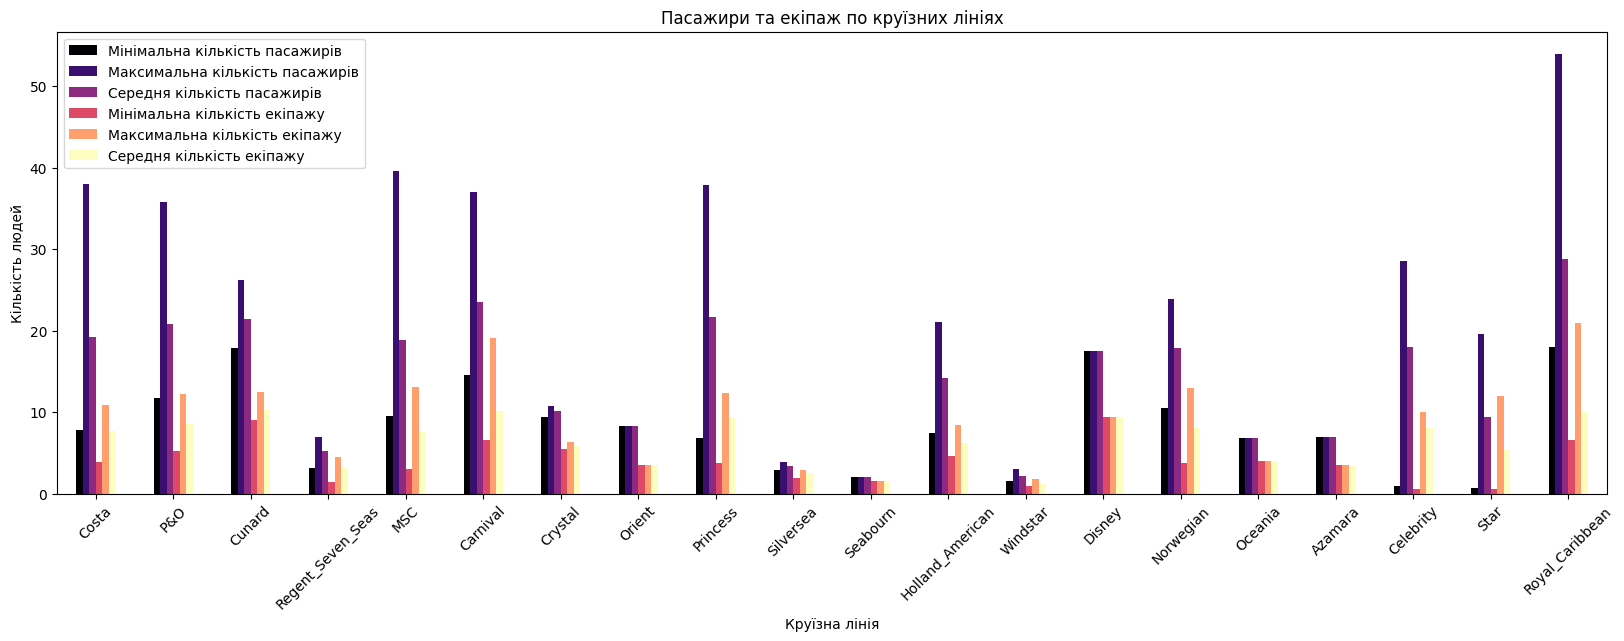

In [26]:
df = data.groupBy('Cruise_line') \
.agg(
    f.min('passengers').alias('Мінімальна кількість пасажирів'),
    f.max('passengers').alias('Максимальна кількість пасажирів'),
    f.avg('passengers').alias('Середня кількість пасажирів'),

    f.min('crew').alias('Мінімальна кількість екіпажу'),
    f.max('crew').alias('Максимальна кількість екіпажу'),
    f.avg('crew').alias('Середня кількість екіпажу'),
    ).toPandas()

ind = list(range(len(df)))

df.iloc[ind, :].plot(
    kind='bar',
    x='Cruise_line',
    y=[
        'Мінімальна кількість пасажирів',
        'Максимальна кількість пасажирів',
        'Середня кількість пасажирів',
        'Мінімальна кількість екіпажу',
        'Максимальна кількість екіпажу',
        'Середня кількість екіпажу',
    ],
    figsize=(20, 6),
    ylabel='Кількість людей',
    xlabel='Круїзна лінія',
    colormap='magma'
)

plt.title('Пасажири та екіпаж по круїзних лініях')
plt.xticks(rotation=45)
plt.show()

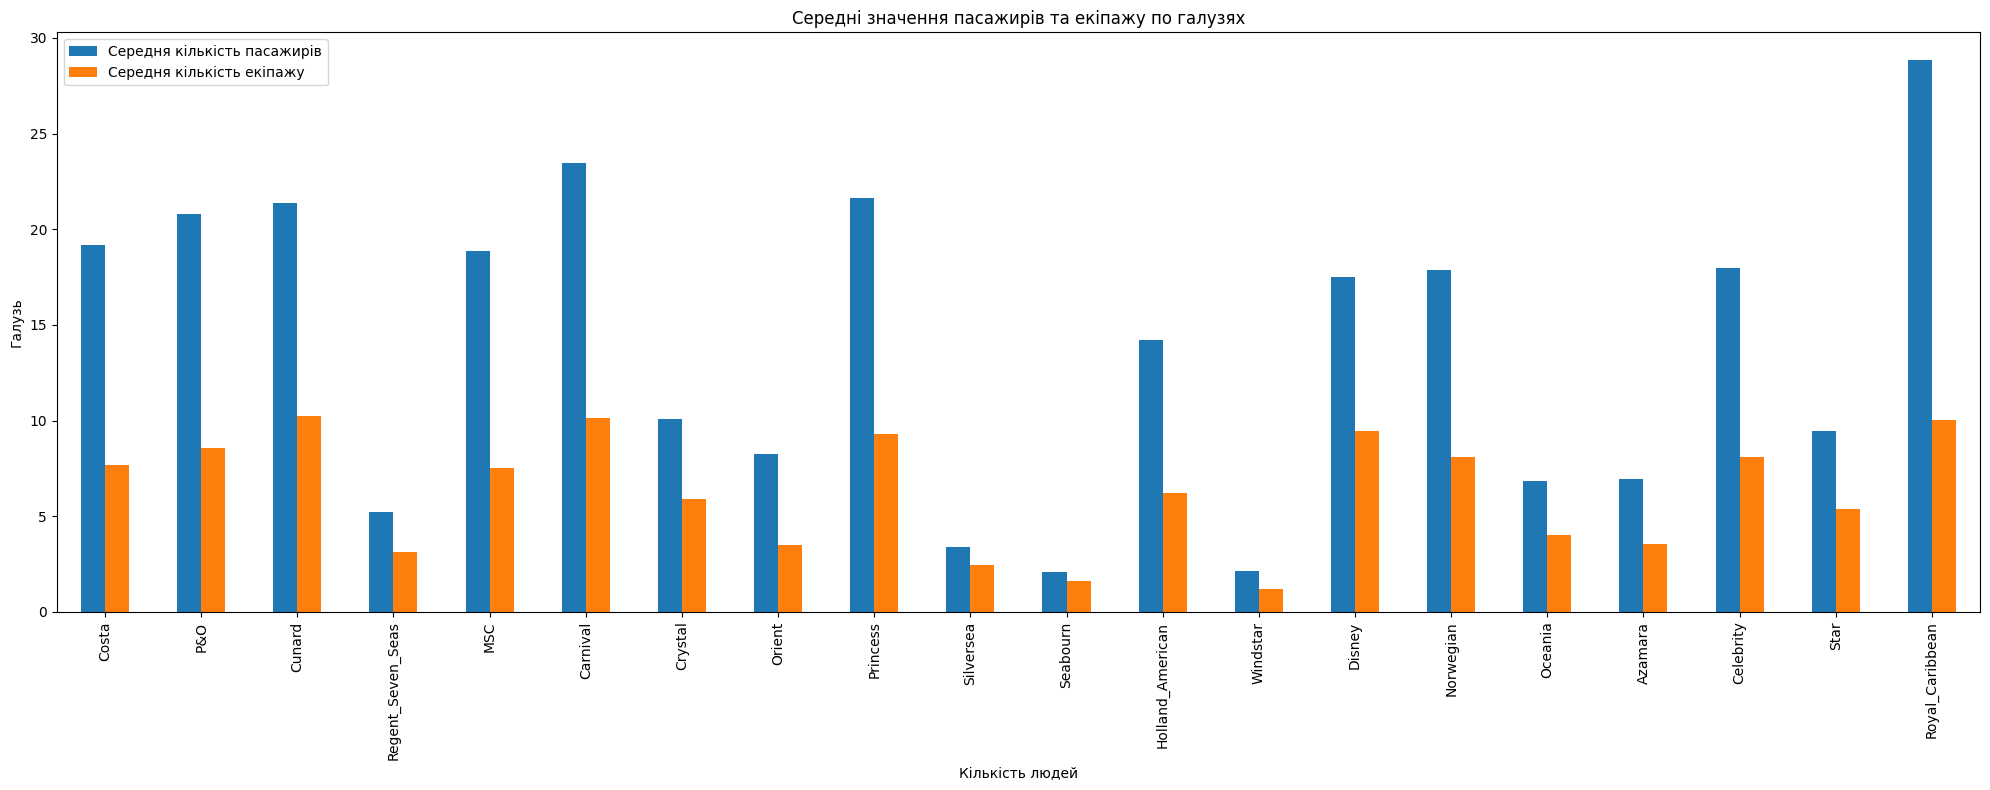

In [27]:
df.plot(kind='bar', x='Cruise_line',  figsize=(20, 8),
        y=['Середня кількість пасажирів', 'Середня кількість екіпажу'],
        xlabel='Кількість людей', ylabel='Галузь')

plt.title('Середні значення пасажирів та екіпажу по галузях')
plt.tight_layout()
plt.show()

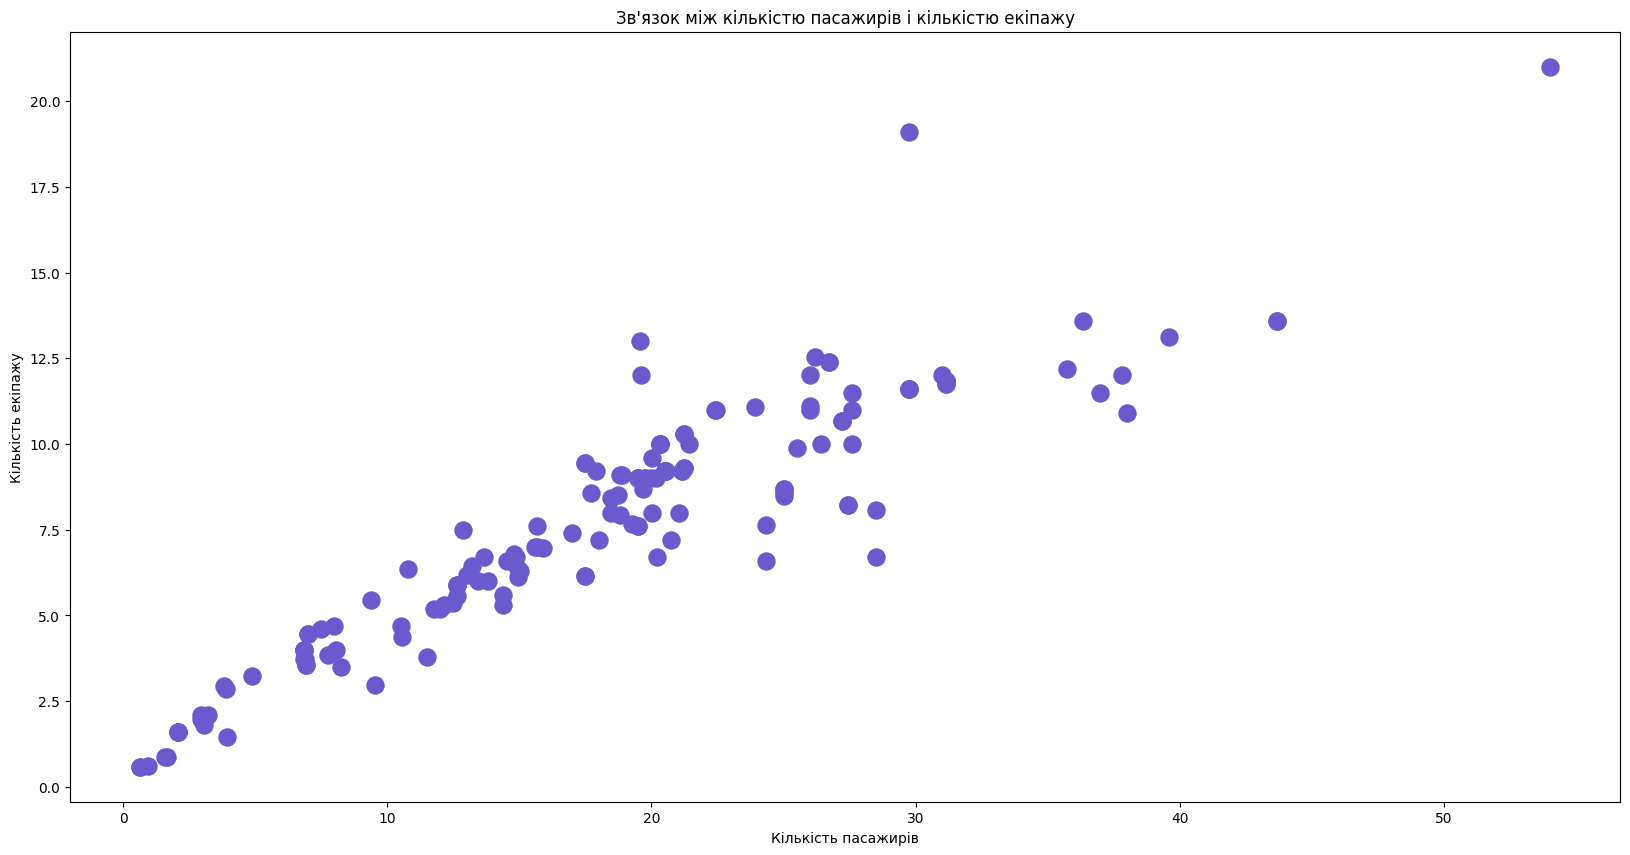

In [28]:
df = data.toPandas()

df.plot(kind='scatter', x='passengers', y='crew', figsize=(20, 10), s=150, color = 'slateblue')
plt.title('Зв\'язок між кількістю пасажирів і кількістю екіпажу')
plt.xlabel('Кількість пасажирів')
plt.ylabel('Кількість екіпажу')
plt.show()